In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import math
import os

### Data Preparation
Membaca data menggunakan pandas:

In [2]:
col_names = ['id', 'Daerah', 'SumbuUtama', 'SumbuKecil', 'Keunikan', 'AreaBulatan', 'Diameter', 'KadarAir', 'Keliling', 'Bulatan', 'Ransum', 'Kelas']
df = pd.read_csv('Gandum.csv', delimiter=',', names = col_names)

Menampilkan *overview* dari data:

In [3]:
df.head()

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
0,1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
1,2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
2,3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
3,4,4141,108.701191,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766960,2.197877,1
4,5,5273,122.747869,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1


### Data Cleaning

Mengecek apakah terdapat data-data kosong. Data-data yang kosong perlu dibersihkan karena mampu mempengaruhi ketepatan nilai hasil perhitungan

In [4]:
df.isnull().sum()

id             0
Daerah         0
SumbuUtama     0
SumbuKecil     0
Keunikan       0
AreaBulatan    0
Diameter       0
KadarAir       0
Keliling       0
Bulatan        0
Ransum         0
Kelas          0
dtype: int64

Karena tidak terdapat data yang bernilai kosong, maka kita tidak perlu melakukan proses pembersihan data

### Data Processing
#### 1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik

##### a) Mean

In [5]:
df.mean(numeric_only = True).round(3)

id              250.500
Daerah         4801.246
SumbuUtama      116.045
SumbuKecil       53.715
Keunikan          0.879
AreaBulatan    4937.048
Diameter         77.771
KadarAir          0.648
Keliling        281.480
Bulatan           0.762
Ransum            2.151
Kelas             1.502
dtype: float64

##### b) Median

In [6]:
df.median(numeric_only = True).round(3)

id              250.500
Daerah         4735.000
SumbuUtama      115.405
SumbuKecil       53.731
Keunikan          0.890
AreaBulatan    4857.000
Diameter         77.645
KadarAir          0.626
Keliling        280.045
Bulatan           0.761
Ransum            2.194
Kelas             2.000
dtype: float64

##### c) Modus

In [7]:
df.mode(numeric_only = True).round(3)

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
0,1,3992.0,74.133,39.907,0.720,3802.0,71.294,0.736,197.015,0.175,1.441,2.0
1,2,4881.0,74.364,41.436,0.726,4913.0,78.833,0.824,200.587,0.261,1.453,NaN
2,3,5642.0,74.692,42.872,0.731,NaN,84.756,NaN,202.456,0.299,1.466,NaN
3,4,6083.0,76.293,43.285,0.739,NaN,88.006,NaN,207.325,0.589,1.483,NaN
4,5,NaN,76.789,44.119,0.749,NaN,NaN,NaN,207.697,0.604,1.510,NaN
5,6,NaN,77.034,44.123,0.753,NaN,NaN,NaN,208.317,0.618,1.519,NaN
6,7,NaN,77.048,44.555,0.754,NaN,NaN,NaN,209.823,0.619,1.522,NaN
7,8,NaN,77.091,44.632,0.761,NaN,NaN,NaN,210.012,0.622,1.540,NaN
8,9,NaN,77.417,44.803,0.761,NaN,NaN,NaN,210.657,0.643,1.542,NaN
9,10,NaN,81.278,44.810,0.763,NaN,NaN,NaN,211.667,0.655,1.547,NaN


Dari tabel diatas, dapat kita lihat bahwa kolom **id**, **SumbuUtama**, **SumbuKecil**, **Keunikan**, **Keliling**, **Bulatan**, dan **Ransum** memiliki baris sepanjang 500. Hal tersebut berarti untuk kolom-kolom tersebut **tidak terdapat nilai modusnya** karena setiap nilainya bersifat unik. Kolom yang memiliki nilai modus adalah **Daerah**, **AreaBulatan**, **Diameter**, **KadarAir** dan **Kelas**.

Modus Daerah

In [8]:
df['Daerah'].mode().round(3)

0    3992
1    4881
2    5642
3    6083
dtype: int64

Modus AreaBulatan

In [9]:
df['AreaBulatan'].mode().round(3)

0    3802
1    4913
dtype: int64

Modus Diameter

In [10]:
df['Diameter'].mode().round(3)

0    71.294
1    78.833
2    84.756
3    88.006
dtype: float64

Modus KadarAir

In [11]:
df['KadarAir'].mode().round(3)

0    0.736
1    0.824
dtype: float64

Modus Kelas

In [12]:
df['Kelas'].mode().round(3)

0    2
dtype: int64

##### d) Standar Deviasi

In [13]:
df.std(numeric_only = True).round(3)

id              144.482
Daerah          986.395
SumbuUtama       18.283
SumbuKecil        4.071
Keunikan          0.037
AreaBulatan    1011.696
Diameter          8.057
KadarAir          0.094
Keliling         37.335
Bulatan           0.062
Ransum            0.250
Kelas             0.500
dtype: float64

##### e) Variansi

In [14]:
df.var(numeric_only = True).round(3)

id               20875.000
Daerah          972976.066
SumbuUtama         334.254
SumbuKecil          16.574
Keunikan             0.001
AreaBulatan    1023529.312
Diameter            64.913
KadarAir             0.009
Keliling          1393.932
Bulatan              0.004
Ransum               0.062
Kelas                0.250
dtype: float64

##### f) Range

In [15]:
(df.max(numeric_only = True)-df.min(numeric_only = True)).round(3)

id              499.000
Daerah         4931.000
SumbuUtama      153.795
SumbuKecil       29.071
Keunikan          0.194
AreaBulatan    5141.000
Diameter         40.747
KadarAir          0.469
Keliling        291.822
Bulatan           0.730
Ransum            1.024
Kelas             1.000
dtype: float64

##### g) Nilai minimum

In [16]:
df.min(numeric_only = True).round(3)

id                1.000
Daerah         2522.000
SumbuUtama       74.133
SumbuKecil       39.907
Keunikan          0.720
AreaBulatan    2579.000
Diameter         56.667
KadarAir          0.410
Keliling        197.015
Bulatan           0.175
Ransum            1.441
Kelas             1.000
dtype: float64

##### h) Nilai maksimum

In [17]:
df.max(numeric_only = True).round(3)

id              500.000
Daerah         7453.000
SumbuUtama      227.929
SumbuKecil       68.978
Keunikan          0.914
AreaBulatan    7720.000
Diameter         97.414
KadarAir          0.879
Keliling        488.837
Bulatan           0.905
Ransum            2.465
Kelas             2.000
dtype: float64

##### i) Kuartil & IQR

Kuartil 1

In [18]:
df.quantile(0.25, numeric_only = True).round(3)

id              125.750
Daerah         4042.750
SumbuUtama      104.116
SumbuKecil       51.194
Keunikan          0.864
AreaBulatan    4170.250
Diameter         71.745
KadarAir          0.573
Keliling        255.883
Bulatan           0.732
Ransum            1.984
Kelas             1.000
Name: 0.25, dtype: float64

Kuartil 2

In [19]:
df.quantile(0.5, numeric_only = True).round(3)

id              250.500
Daerah         4735.000
SumbuUtama      115.405
SumbuKecil       53.731
Keunikan          0.890
AreaBulatan    4857.000
Diameter         77.645
KadarAir          0.626
Keliling        280.045
Bulatan           0.761
Ransum            2.194
Kelas             2.000
Name: 0.5, dtype: float64

Kuartil 3

In [20]:
df.quantile(0.75, numeric_only = True).round(3)

id              375.250
Daerah         5495.500
SumbuUtama      129.047
SumbuKecil       56.325
Keunikan          0.908
AreaBulatan    5654.250
Diameter         83.649
KadarAir          0.727
Keliling        306.062
Bulatan           0.796
Ransum            2.382
Kelas             2.000
Name: 0.75, dtype: float64

IQR

In [21]:
(df.quantile(0.75, numeric_only = True)-df.quantile(0.25, numeric_only = True)).round(3)

id              249.500
Daerah         1452.750
SumbuUtama       24.931
SumbuKecil        5.132
Keunikan          0.044
AreaBulatan    1484.000
Diameter         11.903
KadarAir          0.154
Keliling         50.180
Bulatan           0.064
Ransum            0.398
Kelas             1.000
dtype: float64

##### j) Skewness

In [22]:
df.skew(numeric_only = True).round(3)

id             0.000
Daerah         0.238
SumbuUtama     0.762
SumbuKecil    -0.011
Keunikan      -1.623
AreaBulatan    0.258
Diameter       0.003
KadarAir       0.494
Keliling       0.734
Bulatan       -3.599
Ransum        -0.658
Kelas         -0.008
dtype: float64

##### k) Kurtosis

In [23]:
df.kurtosis(numeric_only = True).round(3)

id             -1.200
Daerah         -0.435
SumbuUtama      4.331
SumbuKecil      0.476
Keunikan        2.917
AreaBulatan    -0.410
Diameter       -0.466
KadarAir       -0.740
Keliling        2.273
Bulatan        29.975
Ransum         -0.429
Kelas          -2.008
dtype: float64

#### 2. Data Visualization

##### 2.1 Histogram

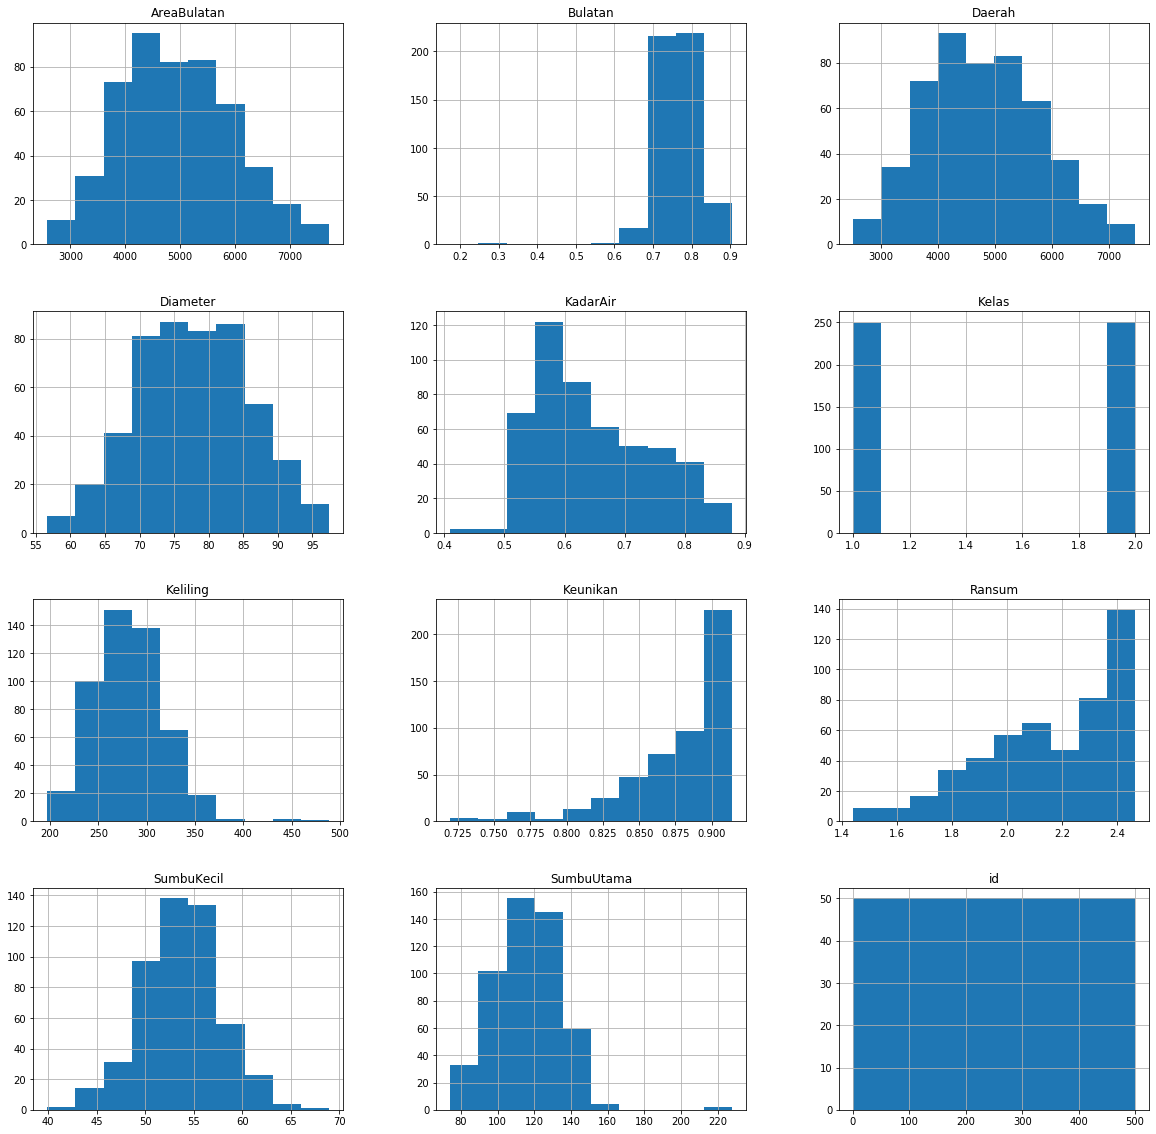

In [24]:
df.hist(figsize=(20,20))
plt.show()

Dari histogram kolom-kolom diatas, kita dapat melihat bahwa setiap kolom memiliki distribusi yang berbeda. Hal yang lumayan mencolok adalah kolom id yang berdistribusi uniform dan kolom Kelas yang memiliki hanya memiliki dua buah persebaran nilai. Dapat dilihat juga bahwa kolom-kolom yang mempunyai nilai skewness yang negatif (seperti yang telah dihitung pada bagian deskripsi statistik sebelumnya) berarti memiliki kemiringan pada sisi kiri grafik yang lebih panjang sehingga nilai-nilai mean dan juga median akan lebih kecil daripada nilai modusnya dan berlaku pula untuk kebalikannya yaitu saat memiliki skewness positif.

Pada beberapa histogram dari kolom, dapat juga dilihat sebuah outlier, yang merupakan data yang berbeda secara signifikan dari data-data yang lain seperti pada kolom SumbuUtama yang memiliki outlier atas dengan nilai sekitar 220 dan juga kolom Keliling dengan outlier atas bernilai sekitar 450. Selain itu, kita juga dapat melihat outlier bawah seperti yang terdapat pada kolom Bulatan dengan nilai diantara 0.2 dan 0.3 serta kolom kadar air pada nilai diantara 0.725-0.800 .

##### 2.2 Boxplot

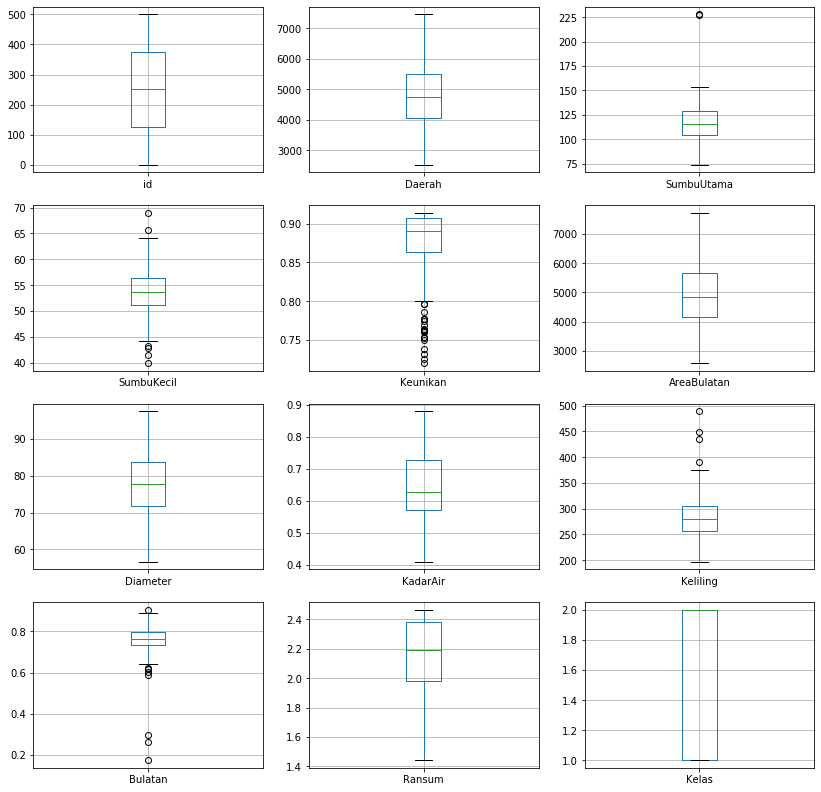

In [25]:
boxCols = 3
boxRows = math.ceil(len(df.columns)/boxCols)

fig, axes = plt.subplots(nrows=boxRows, ncols=boxCols, figsize=(14,14))

row = 0
for i, col in enumerate(df.columns):
    df.boxplot(column=col, ax=axes[row, i%boxCols])
    if i % boxCols == boxCols-1:
        row += 1

lastCol = (len(df.columns)+1)%boxCols-1
for i in range(boxCols*boxRows-len(df.columns)):
    fig.delaxes(axes[row, i+lastCol])
plt.show()

Sementara pada representasi boxplot diatas untuk setiap kolom, dapat dilihat bahwa kotak dari setiap diagram menggambarkan kuartil dari setiap data kolom dengan panjang kolom sebagai IQR (interkuartil) dengan ujung box paling atas merupakan Q3 atau kuartil 3 dan ujung box paling bawah merupakan Q1 atau kuartil 1. Kemudian, kita juga dapat mengetahui nilai tengah atau median dari data, yang dapat dilihat pada garis tengah di box pada boxplot.

Lalu, pada beberapa kolom terdapat juga data-data outliers seperti pada bagian data histogram. Outlier ini dapat kita lihat sebagai lingkaran yang letaknya berada di bawah nilai minimum atau di atas nilai maksimum. Outlier pada boxplot dapat lebih jelas kita identifikasi jika dibandingkan dengan menggunakan histogram. Kolom-kolom yang terdapat outlier adalah SumbuKecil, Keunikan, Keliling, dan Bulatan.

#### 3. Normality Test

Hipotesis null yang ditentukan adalah, **"suatu data dikatakan berdistribusi normal jika histogram plotnya memiliki bentuk *Gaussian Shape* atau sering juga kita ketahui sebagai grafik distribusi normal"**.

Normality test yang akan digunakan adalah **Shapiro-Wilk Test**. Dari Shapiro-Wilk test, kita bisa mendapatkan *p-value* dan kemudian kita dapat menolak hipotesis null kita jika *p-value* lebih kecil dibanding tingkat signifikansi α yang diinginkan, yaitu 0.05 .

Shapiro-Wilk: 0.9547221064567566, p: 2.945410582100294e-11
Tidak memiliki bentuk Gaussian


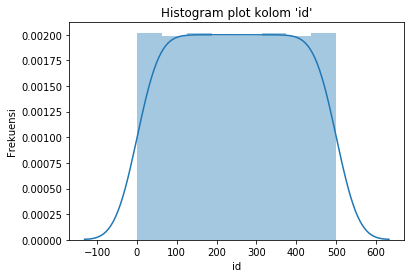

Shapiro-Wilk: 0.9907860159873962, p: 0.003270698245614767
Tidak memiliki bentuk Gaussian


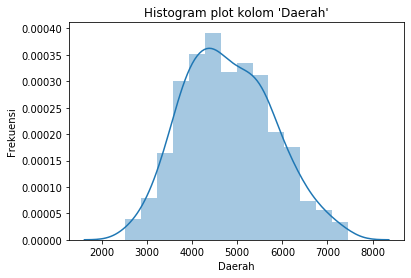

Shapiro-Wilk: 0.9513812065124512, p: 9.236201213569384e-12
Tidak memiliki bentuk Gaussian


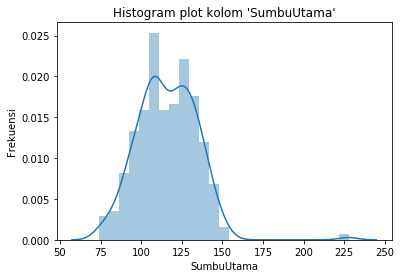

Shapiro-Wilk: 0.996778666973114, p: 0.4234558641910553
Memiliki bentuk Gaussian


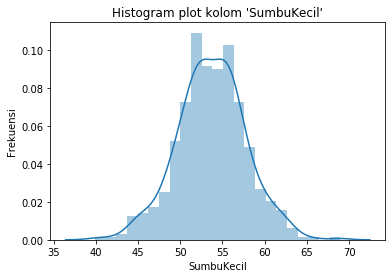

Shapiro-Wilk: 0.8309029340744019, p: 1.3151663082081454e-22
Tidak memiliki bentuk Gaussian


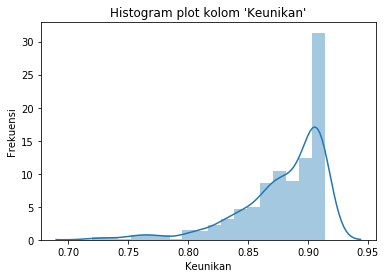

Shapiro-Wilk: 0.990435779094696, p: 0.0024847122840583324
Tidak memiliki bentuk Gaussian


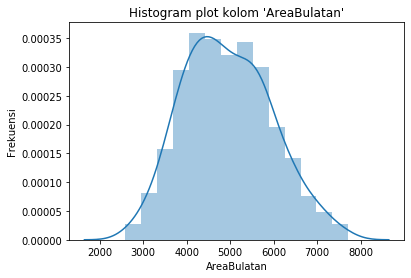

Shapiro-Wilk: 0.9951366186141968, p: 0.11834503710269928
Memiliki bentuk Gaussian


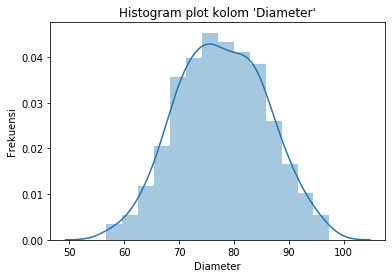

Shapiro-Wilk: 0.9466671347618103, p: 1.959499836695633e-12
Tidak memiliki bentuk Gaussian


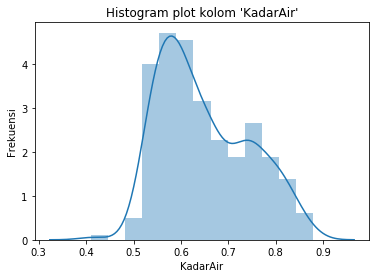

Shapiro-Wilk: 0.9692449569702148, p: 9.728394090302572e-09
Tidak memiliki bentuk Gaussian


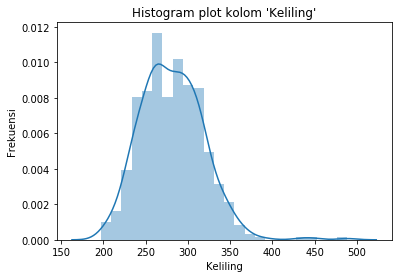

Shapiro-Wilk: 0.7697757482528687, p: 6.899158691421287e-26
Tidak memiliki bentuk Gaussian


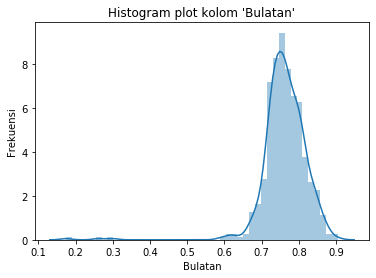

Shapiro-Wilk: 0.9265043139457703, p: 6.245541108888591e-15
Tidak memiliki bentuk Gaussian


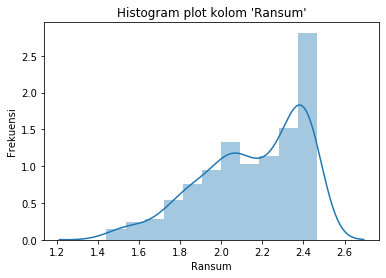

Shapiro-Wilk: 0.6365421414375305, p: 3.5514183439331154e-31
Tidak memiliki bentuk Gaussian


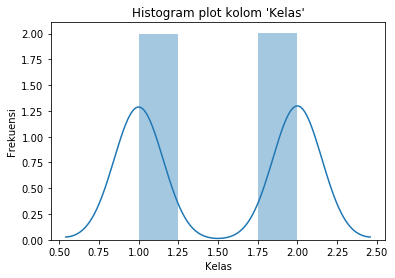

In [26]:
def norm_test(df, col):
    print("============================================================")
    # Normality test
    W, p = stats.shapiro(df[col])
    print("Shapiro-Wilk: {0}, p: {1}".format(W,p))
    # Interpret
    alpha = 0.05
    if p > alpha:
        print('Memiliki bentuk Gaussian')
    else:
        print('Tidak memiliki bentuk Gaussian')
    sns.distplot(df[col])
    plt.title("Histogram plot kolom '" + str(col) + "'")
    plt.ylabel("Frekuensi")
    plt.show()

for col in df:
    norm_test(df, col)

Oleh karena itu, berdasarkan test yang telah dilakukan, dapat disimpulkan bahwa kolom-kolom yang **berdistribusi normal** yaitu, kolom **'Diameter'**, dan **'SumbuKecil'**.

#### 4. Test Hipotesis 1 Sampel

a. Nilai rata-rata Daerah di atas 4700 <br>
&emsp; $H_0$ : mean = 4700 <br>
&emsp; $H_1$ : mean > 4700 <br>
&emsp; α = 0.05 <br>
&emsp; Uji statistik : Z-test <br>
&emsp; Zα = 1.645 <br>
&emsp; Critical region : Z > 1.645

Z = 2.295153824252517
Hipotesis H0 ditolak


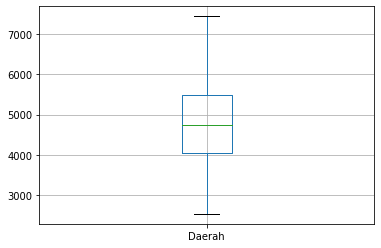

P-values = 0.010862155196799894


In [27]:
u = 4700
z_alpha = 1.645
rata2 = df['Daerah'].mean()
std_deviasi = df['Daerah'].std()
n = len(df.index)
z = (rata2-u)/(std_deviasi/math.sqrt(n))
print("Z = " + str(z))
if(z > z_alpha):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")
df.boxplot(column = 'Daerah')
plt.show()

p_values = stats.norm.sf(abs(z))
print("P-values = " + str(p_values))

__Kesimpulan__ : Berdasarkan uji statistik, nilai Z terletak pada daerah kritis dan juga P-values lebih kecil dibandingkan dengan tingkat signifikansi α. Oleh karena itu, hipotesis $H_0$ __ditolak__ sehingga kita beralih ke hipotesis alternatif $H_1$ yaitu nilai rata-rata Daerah berada __DI ATAS__ 4700 dan setelah dilihat pada data, nilai rata-rata dari kolom Daerah yaitu 4801.

b. Nilai rata-rata SumbuUtama tidak sama dengan 116 <br>
&emsp; $H_0$ : mean = 116 <br>
&emsp; $H_1$ : mean ≠ 116 <br>
&emsp; α = 0.05 <br>
&emsp; Uji statistik : Z-test <br>
&emsp; Z(α/2) = 1.960 <br>
&emsp; Critical region : Z < -1.960 atau Z > 1.960 

Z = 0.055247123267335795
Hipotesis H0 diterima


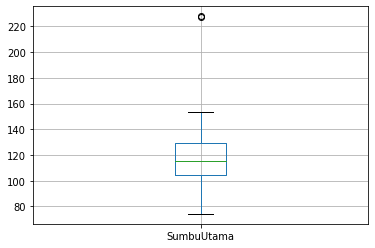

P-values = 0.4779707936488622


In [28]:
u = 116
z_alpha = 1.960
rata2 = df['SumbuUtama'].mean()
std_deviasi = df['SumbuUtama'].std()
n = len(df.index)
z = (rata2-u)/(std_deviasi/math.sqrt(n))
print("Z = " + str(z))
if((z < -z_alpha) or (z > z_alpha)):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")
df.boxplot(column = 'SumbuUtama')
plt.show()

p_values = stats.norm.sf(abs(z))
print("P-values = " + str(p_values))

__Kesimpulan__ : Berdasarkan uji statistik, nilai Z tidak terletak pada daerah kritis dan juga P-values jauh lebih besar dibandingkan dengan tingkat signifikansi α. Oleh karena itu, hipotesis $H_0$ __gagal untuk ditolak__ yaitu nilai rata-rata SumbuUtama __SAMA DENGAN__ 116. Setelah dilihat pada data, benar bahwa nilai rata-rata kolom SumbuUtama yaitu 116.

c. Nilai rata-rata 20 baris pertama kolom SumbuKecil bukan 50 <br>
&emsp; $H_0$ : mean 20 baris pertama = 50 <br>
&emsp; $H_1$ : mean 20 baris pertama ≠ 50 <br>
&emsp; α = 0.05 <br>
&emsp; Uji statistik : t-test <br>
&emsp; v = 20-1 = 19 <br>
&emsp; t(α/2) = 2.093 <br>
&emsp; Critical region : t < -2.093 atau t > 2.093

t = 6.478168916968886
Hipotesis H0 ditolak


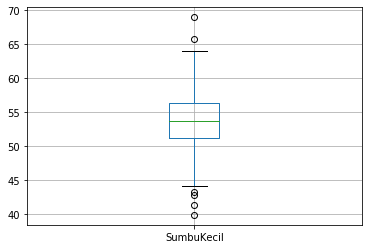

P-values = 1.65100928221228e-06


In [29]:
u = 50
t_alpha = 2.093
df_first20 = df.head(20)
rata2 = df_first20['SumbuKecil'].mean()
std_deviasi = df_first20['SumbuKecil'].std()
n = len(df_first20.index)
v = n-1
t = (rata2-u)/(std_deviasi/math.sqrt(n))
print("t = " + str(t))
if((t < -t_alpha) or (t > t_alpha)):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")
df.boxplot(column = 'SumbuKecil')
plt.show()

p_values = stats.t.sf(abs(t), v)
print("P-values = " + str(p_values))

__Kesimpulan__ : Berdasarkan uji statistik, nilai t terletak pada daerah kritis dan juga P-values jauh lebih kecil dibandingkan dengan tingkat signifikansi α. Oleh karena itu, hipotesis $H_0$ __ditolak__ sehingga kita beralih ke hipotesis alternatif $H_1$ yaitu nilai rata-rata 20 baris pertama kolom SumbuKecil __BUKAN__ 50 dan setelah dihitung nilai rata-rata sebenarnya dari 20 baris pertama kolom SumbuKecil, nilainya adalah 54.89

d. Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% <br>
&emsp; $H_0$ : p = 0.15 <br>
&emsp; $H_1$ : p ≠ 0.15 <br>
&emsp; α = 0.05 <br>
&emsp; Uji statistik : Z-test <br>
&emsp; Z(α/2) = 1.960 <br>
&emsp; Critical region : Z < -1.960 atau Z > 1.960

z = 2.755386880774658
Hipotesis H0 ditolak


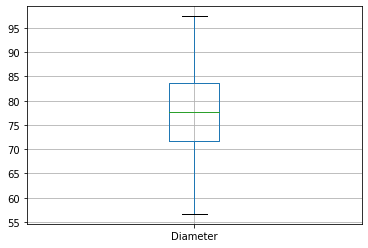

P-values = 0.002931138584204827


In [30]:
p = 0.15
z_alpha = 1.960
df_above85 = df[df['Diameter'] > 85]
x = len(df_above85.index)
n = len(df.index)
p_hat = x/n
z = (p_hat-p)/(math.sqrt(p*(1-p)/n))
print("z = " + str(z))
if((z < -z_alpha) or (z > z_alpha)):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")
df.boxplot(column = 'Diameter')
plt.show()

p_values = stats.norm.sf(abs(z))
print("P-values = " + str(p_values))

__Kesimpulan__ : Berdasarkan uji statistik, nilai Z terletak pada daerah kritis dan juga P-values yang jauh lebih kecil dibandingkan dengan tingkat signifikansi α. Oleh karena itu, hipotesis $H_0$ __ditolak__ sehingga kita beralih ke hipotesis alternatif $H_1$ yaitu proporsi nilai Diameter yang lebih dari 85 __TIDAK SAMA DENGAN__ 15%. Setelah dihitung proporsi nilai yang lebih dari 85 pada kolom Diameter, nilainya adalah 19.4%

e. Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% <br>
&emsp; $H_0$ : p = 0.05 <br>
&emsp; $H_1$ : p < 0.05 <br>
&emsp; α = 0.05 <br>
&emsp; Uji statistik : Z-test <br>
&emsp; Zα = 1.645 <br>
&emsp; Critical region : Z < -1.645

z = -5.129891760425771
Hipotesis H0 ditolak


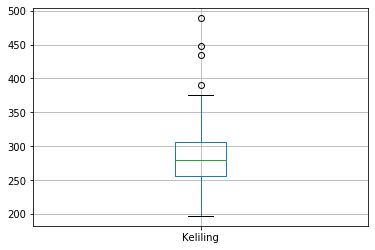

P-values = 1.4495441414387716e-07


In [31]:
p = 0.05
z_alpha = 1.645
df_below100 = df[df['Keliling'] < 100]
x = len(df_below100.index)
n = len(df.index)
p_hat = x/n
z = (p_hat-p)/(math.sqrt(p*(1-p)/n))
print("z = " + str(z))
if(z < -z_alpha):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")
df.boxplot(column = 'Keliling')
plt.show()

p_values = stats.norm.sf(abs(z))
print("P-values = " + str(p_values))

__Kesimpulan__ : Berdasarkan uji statistik, nilai Z terletak pada daerah kritis dan juga P-values yang jauh sangat lebih kecil dibandingkan dengan tingkat signifikansi α. Oleh karena itu, hipotesis $H_0$ __ditolak__ sehingga kita beralih ke hipotesis alternatif $H_1$ yaitu proporsi nilai Keliling yang kurang dari 100 adalah __KURANG DARI__ 5%. Setelah dilihat pada data, nilai minimal dari kolom Keliling adalah 197 sehingga tidak mungkin ada nilai Keliling yang kurang dari 100.

#### 5. Test Hipotesis 2 Sampel

**a) Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom.
Benarkah rata-rata kedua bagian tersebut sama?**

Dari pernyataan tersebut, dapat ditentukan hipotesis

$H_0$: $\mu_1$ = $\mu_2$

$H_1$: $\mu_1$ $\neq$ $\mu_2$

dengan $\mu_1$ adalah rata-rata bagian awal kolom AreaBulatan dan $\mu_2$ adalah rata-rata bagian akhir kolom AreaBulatan, serta $\alpha$ = 0.05.

Diasumsikan kolom AreaBulatan berdistribusi normal. Uji statistik yang akan digunakan adalah dengan z-test dan hipotesisnya merupakan hipotesis yang two-tailed

In [32]:
# Mencari daerah kritis
sample = df.shape[0]//2
def round_half_up(n, decimals=0):
    # Untuk rounding half up
    # Sumber : https://www.knowledgehut.com/blog/programming/python-rounding-numbers
    mul = 10 ** decimals
    return math.floor(n*mul + 0.5) / mul

# Menggunakan round_half_up karena jika tidak akan bernilai 1.64
# Tanpa round_half_up: 1.645 -> 1.64, Dengan round_half_up: 1.645 -> 1.65
c_val = round_half_up(stats.norm.ppf(0.95).round(3),2)

# Daerah kritis untuk two-tailed, p < -Po atau p > Po
print("Daerah kritisnya terletak di c < {0} atau c > {1}".format(abs(c_val)*(-1),abs(c_val)))

Daerah kritisnya terletak di c < -1.65 atau c > 1.65


Selanjutnya untuk menghitung nilai statistiknya digunakan rumus berikut

$$z = \frac{\bar{X_1}-\bar{X_2}-\Delta}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$$

In [33]:
def zmean(a, b, Delta, n1, n2):
    std_err = math.sqrt((a.var()/n1)+(b.var()/n2))
    z = (a.mean()-b.mean()-Delta)/std_err
    return z

# Menghitung nilai uji statistik
area_1 = df['AreaBulatan'].head(sample) # Bagian awal kolom
area_2 = df['AreaBulatan'].tail(sample) # Bagian akhir kolom
result = zmean(area_1, area_2, 0, sample, sample)
print("z = {0}".format(result))

z = 17.013036648485464


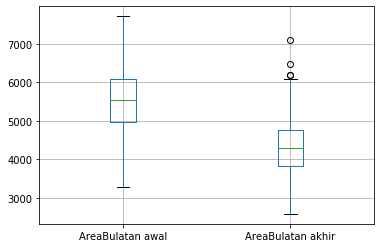

In [34]:
# Boxplot
data_to_plot = pd.DataFrame({"AreaBulatan awal": area_1, "AreaBulatan akhir": area_2})
data_to_plot.boxplot()

**Kesimpulan** : Karena z terletak pada daerah kritis, lebih tepatnya pada daerah c > 1.65, maka $H_0$ dapat **ditolak**

**b) Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?**

Dari pernyataan tersebut, dapat ditentukan hipotesis

$H_0$: $\mu_1$ - $\mu_2$ = 0.2

$H_1$: $\mu_1$ - $\mu_2$ $\neq$ 0.2

dengan $\mu_1$ adalah rata-rata bagian awal kolom KadarAir dan $\mu_2$ adalah rata-rata bagian akhir kolom KadarAir, serta $\alpha$ = 0.05

Diasumsikan kolom KadarAir berdistribusi normal. Uji statistik yang akan digunakan adalah dengan z-test dan hipotesisnya merupakan hipotesis yang two-tailed

In [35]:
# Mencari daerah kritis
c_val = round_half_up(stats.norm.ppf(0.95).round(3),2)

# Daerah kritis untuk two-tailed, p < -Po atau p > Po
print("Daerah kritisnya terletak di c < {0} atau c > {1}".format(abs(c_val)*(-1),abs(c_val)))

Daerah kritisnya terletak di c < -1.65 atau c > 1.65


Selanjutnya untuk menghitung nilai statistiknya digunakan rumus berikut

$$z = \frac{\bar{X_1}-\bar{X_2}-\Delta}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$$

In [36]:
# Menghitung nilai uji statistik
kadar_1 = df['KadarAir'].head(sample) # Bagian awal kolom
kadar_2 = df['KadarAir'].tail(sample) # Bagian akhir kolom
result = zmean(kadar_1, kadar_2, 0.2, sample, sample)
print("z = {0}".format(result))

z = -26.903444249744958


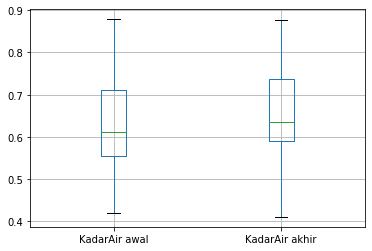

In [37]:
# Boxplot
data_to_plot = pd.DataFrame({"KadarAir awal": kadar_1, "KadarAir akhir": kadar_2})
data_to_plot.boxplot()

**Kesimpulan** : Karena z terletak pada daerah kritis, lebih tepatnya pada daerah c < -1.65, maka $H_0$ dapat **ditolak**

**c) Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?**

Dari pernyataan tersebut, dapat ditentukan hipotesis

$H_0$: $\mu_1$ = $\mu_2$

$H_1$: $\mu_1$ $\neq$ $\mu_2$

dengan $\mu_1$ adalah rata-rata 20 baris pertama kolom Bulatan dan $\mu_2$ adalah rata-rata 20 baris terakhir kolom Bulatan, serta $\alpha$ = 0.05

Diasumsikan kolom Bulatan berdistribusi normal. Uji statistik yang akan digunakan adalah dengan t-distribution karena sampel yang digunakan < 30 dan hipotesisnya merupakan hipotesis yang two-tailed

In [38]:
# Mencari daerah kritis
def degreeFreedom2(n1,n2):
    return (n1+n2-2)

c_val = stats.t.ppf(0.975, degreeFreedom2(sample,sample)).round(3)

# Daerah kritis untuk two-tailed, p < -Po atau p > Po
print("Daerah kritisnya terletak di c < {0} atau c > {1}".format(abs(c_val)*(-1),abs(c_val)))

Daerah kritisnya terletak di c < -1.965 atau c > 1.965


Selanjutnya untuk menghitung nilai statistiknya digunakan rumus berikut

$$t = \frac{(\bar{X_1}-\bar{X_2})-(\mu_1 -\mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$$

In [39]:
# Menghitung nilai uji statistik
def tmean(a, b, mu1, mu2, n1, n2):
    std_err = math.sqrt((a.var()/n1)+(b.var()/n2))
    t = ((a.mean()-b.mean())-(mu1-mu2))/std_err
    return t

bulatan_1 = df['Bulatan'].head(20) # 20 Baris pertama kolom
bulatan_2 = df['Bulatan'].tail(20) # 20 Baris terakhir kolom
result = tmean(bulatan_1, bulatan_2, 0, 0, 20, 20)
print("t = {0}".format(result))

t = -3.3792268633124025


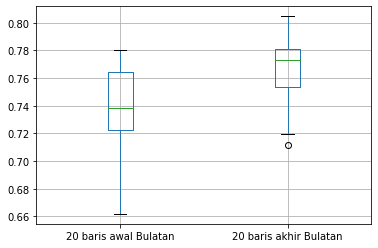

In [40]:
# Boxplot
data_to_plot = pd.DataFrame({"20 baris awal Bulatan": bulatan_1, "20 baris akhir Bulatan": bulatan_2})
data_to_plot.boxplot()

**Kesimpulan** : Karena t terletak pada daerah kritis, lebih tepatnya pada daerah c < -1.965, maka $H_0$ dapat **ditolak**

**d) Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada,
proporsi nilai yang sama di bagian akhir Ransum?**

Dari pernyataan tersebut, dapat ditentukan hipotesis

$H_0$: P(X>2) = P(Y>2)

$H_1$: P(X>2) > P(Y>2)

dengan X adalah variabel random nilai bagian awal yang lebih dari 2 dan Y adalah variabel random nilai bagian akhir yang lebih dari 2, serta $\alpha$ = 0.05

Diasumsikan kolom Ransum berdistribusi normal. Uji statistik yang akan digunakan adalah dengan z-test dan hipotesisnya merupakan hipotesis yang one-tailed

In [41]:
# Mencari daerah kritis
c_val = round_half_up(stats.norm.ppf(0.95).round(3),2)

# Daerah kritis untuk one-tailed, c > p
print("Daerah kritisnya terletak di c > {0}".format(abs(c_val)))

Daerah kritisnya terletak di c > 1.65


Selanjutnya untuk menghitung nilai statistiknya digunakan rumus berikut
$$z_t = \frac{(\hat{p_1}-\hat{p_2})-(p_1 -p_2)}{\sqrt{\hat{p_c}(1-\hat{p_c})(\frac{1}{n_1} + \frac{1}{n_2})}}$$

yang mana $\hat{p_c}$ merupakan *pooled proportion* dari distribusi dan nilainya dihitung dengan
$$\hat{p_c} = \frac{x_a+x_b}{n_a+n_b}$$

In [42]:
# Menghitung nilai uji statistik
def zscore(p1,p2,pc,n1,n2):
    return (p1-p2)/math.sqrt(pc*(1-pc)*(1/n1+1/n2))

def pooledProportion(Xa, Xb, Na, Nb):
    return (Xa+Xb)/(Na+Nb)

ransum_1 = pd.DataFrame(df['Ransum'].head(sample)) # Bagian awal kolom
ransum_2 = pd.DataFrame(df['Ransum'].tail(sample)) # Bagian akhir kolom

new_ransum_1 = ransum_1.loc[ransum_1['Ransum'] > 2]
count1 = new_ransum_1.shape[0] # Jumlah data yang > 2 pada bagian awal
new_ransum_2 = ransum_2.loc[ransum_2['Ransum'] > 2]
count2 = new_ransum_2.shape[0] # Jumlah data yang > 2 pada bagian akhir

p1 = count1/sample
p2 = count2/sample
pc = pooledProportion(count1, count2, sample, sample)
zt = round(zscore(p1,p2,pc,sample,sample),3)
print("Zt = {0}".format(zt))

Zt = 13.397


**Kesimpulan** : Karena z terletak pada daerah kritis, maka $H_0$ dapat **ditolak**

**e) Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?**

Dari pernyataan tersebut, dapat ditentukan hipotesis

$H_0$: $\sigma^2_1$ = $\sigma^2_2$

$H_1$: $\sigma^2_1$ $\neq$ $\sigma^2_2$

dengan $\sigma^2_1$ adalah varians bagian awal dan $\sigma^2_2$ adalah varians bagian akhir, serta $\alpha$ = 0.05

Diasumsikan kolom Diameter berdistribusi normal. Uji statistik yang akan digunakan adalah dengan f-test karena kita ingin mencari variansi dan hipotesisnya merupakan hipotesis yang two-tailed

In [43]:
# Mencari daerah kritis
c_val = stats.f.ppf(0.975, 239, 239).round(3)

# Daerah kritis untuk two-tailed, p > Po
print("Daerah kritisnya terletak di c > {0}".format(abs(c_val)))

Daerah kritisnya terletak di c > 1.289


Selanjutnya untuk menghitung nilai statistiknya digunakan rumus berikut
$$F = \frac{larger  sample  variance}{smaller sample variance}$$

In [44]:
# Menghitung nilai uji statistik
diameter_1 = df['Diameter'].head(sample) # Bagian awal kolom
diameter_2 = df['Diameter'].tail(sample) # Bagian akhir kolom

# Untuk two-tailed test, 
# Tentukan varians yang lebih besar
if (diameter_1.var() > diameter_2.var()):
    larger = diameter_1.var()
    smaller = diameter_2.var()
else:
    larger = diameter_2.var()
    smaller = diameter_1.var()
    
result = larger/smaller
print("F = {0}".format(result))

F = 1.0838780220421882


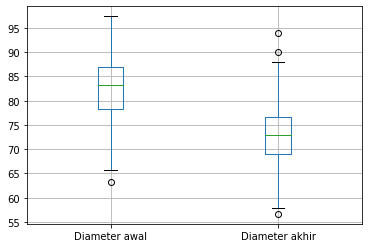

In [45]:
# Boxplot
data_to_plot = pd.DataFrame({"Diameter awal": diameter_1, "Diameter akhir": diameter_2})
data_to_plot.boxplot()

**Kesimpulan** : Karena tidak terletak pada daerah kritis, maka $H_0$ **gagal untuk ditolak**

#### 6. Correlation Test

Korelasi antara kolom Daerah dan Kelas adalah -0.6027466517416654
Kolom non-target Daerah tidak berkorelasi dengan kolom target Kelas


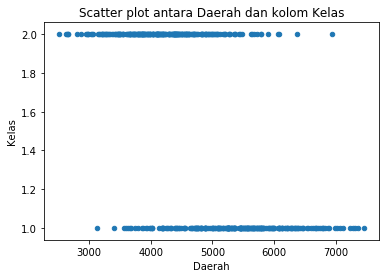

Korelasi antara kolom SumbuUtama dan Kelas adalah -0.7130906104204592
Kolom non-target SumbuUtama tidak berkorelasi dengan kolom target Kelas


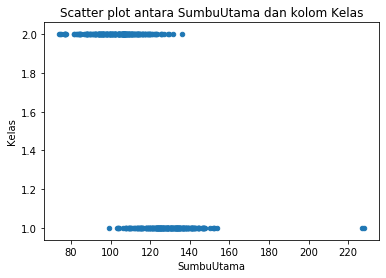

Korelasi antara kolom SumbuKecil dan Kelas adalah -0.15297517335535024
Kolom non-target SumbuKecil tidak berkorelasi dengan kolom target Kelas


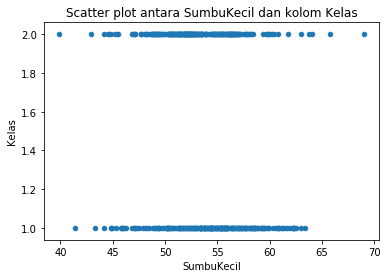

Korelasi antara kolom Keunikan dan Kelas adalah -0.7304563686511927
Kolom non-target Keunikan tidak berkorelasi dengan kolom target Kelas


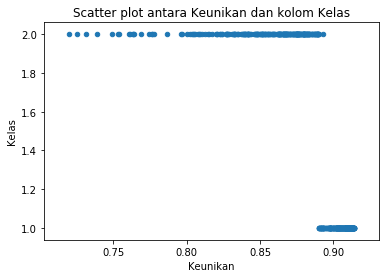

Korelasi antara kolom AreaBulatan dan Kelas adalah -0.6073125434153747
Kolom non-target AreaBulatan tidak berkorelasi dengan kolom target Kelas


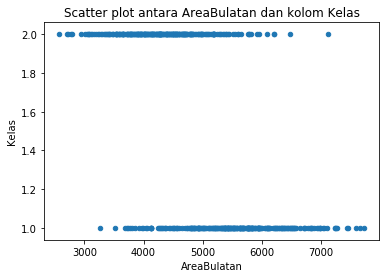

Korelasi antara kolom Diameter dan Kelas adalah -0.6025356896618811
Kolom non-target Diameter tidak berkorelasi dengan kolom target Kelas


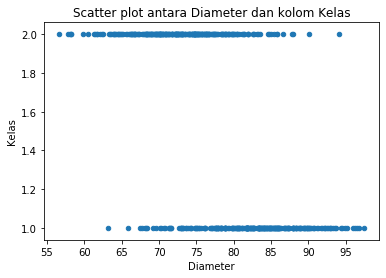

Korelasi antara kolom KadarAir dan Kelas adalah 0.13434422605727642
Kolom non-target KadarAir berkorelasi dengan kolom target Kelas


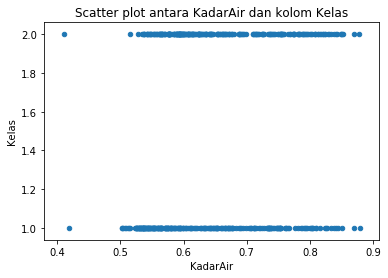

Korelasi antara kolom Keliling dan Kelas adalah -0.6348607454756853
Kolom non-target Keliling tidak berkorelasi dengan kolom target Kelas


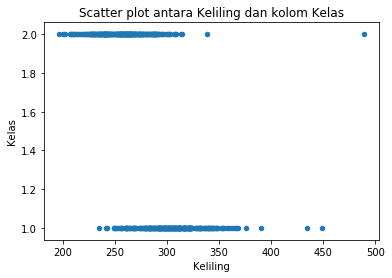

Korelasi antara kolom Bulatan dan Kelas adalah 0.5450045317240073
Kolom non-target Bulatan berkorelasi dengan kolom target Kelas


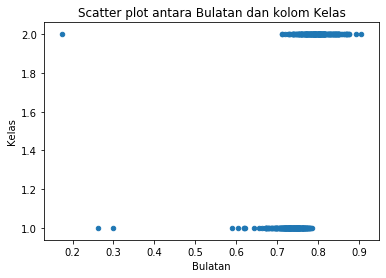

Korelasi antara kolom Ransum dan Kelas adalah -0.8399038681287486
Kolom non-target Ransum tidak berkorelasi dengan kolom target Kelas


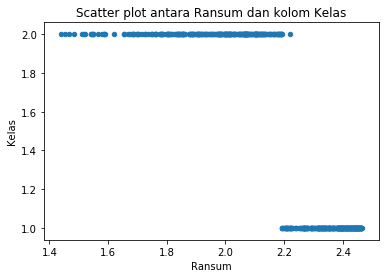

In [46]:
for atribut in col_names:
    if(atribut == "id" or atribut == "Kelas"):
        continue
    kolom_target = df[atribut]
    kolom_nonTarget = df["Kelas"]
    korelasi = kolom_target.corr(kolom_nonTarget)
    print("Korelasi antara kolom " + atribut + " dan Kelas adalah " + str(korelasi))
    if(korelasi > 0):
        print("Kolom non-target " + atribut + " berkorelasi dengan kolom target Kelas")
    else:
        print("Kolom non-target " + atribut + " tidak berkorelasi dengan kolom target Kelas")
    
    dataFrame = pd.DataFrame(data = df, columns = [atribut, 'Kelas'])
    korelasiTitle = "Scatter plot antara " + atribut + " dan kolom Kelas"
    dataFrame.plot.scatter(x = atribut, y = 'Kelas', title = korelasiTitle)
    plt.show()

Made with sweat and tears by:
- Raihan Astrada Fathurrahman (13519113)
- Maximillian Lukman (13519153)